In [53]:
import pandas as po
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# read mushra.csv by pandas
df = po.read_csv('mushra.csv')
df

,session_test_id,session_uuid,trial_id,rating_stimulus,rating_score,rating_time,rating_comment
0,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,PS,23,82364,NaN
1,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,SS,39,82364,NaN
2,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,WS,69,82364,NaN
3,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,AN,13,82364,NaN
4,pitch_shift,c73f6906-aecb-4172-925d-87589f490437,training,EL,77,82364,NaN
...,...,...,...,...,...,...,...
275,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,AN,5,81771,NaN
276,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,WS,90,81771,NaN
277,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,EL,60,81771,NaN
278,pitch_shift,e40772cd-016d-456e-aa5f-05fd7aade0c3,guitar_round,SS,20,81771,NaN


In [55]:
# delete record with trial_id == "training"
df = df[df['trial_id'] != 'training']

# delete columns except for "trial_id", "rating_stimulus", "rating_score"
df = df[['trial_id', 'rating_stimulus', 'rating_score']]

df

,trial_id,rating_stimulus,rating_score
5,mix_min_12,EL,21
6,mix_min_12,PS,44
7,mix_min_12,WS,59
8,mix_min_12,AN,7
9,mix_min_12,SS,76
...,...,...,...
275,guitar_round,AN,5
276,guitar_round,WS,90
277,guitar_round,EL,60
278,guitar_round,SS,20


In [56]:
# map rating score from 0-100 to 1-5 MOS scale
df['rating_score'] = df['rating_score'].map(lambda x: (x/100)*4+1)
df

,trial_id,rating_stimulus,rating_score
5,mix_min_12,EL,1.84
6,mix_min_12,PS,2.76
7,mix_min_12,WS,3.36
8,mix_min_12,AN,1.28
9,mix_min_12,SS,4.04
...,...,...,...
275,guitar_round,AN,1.20
276,guitar_round,WS,4.60
277,guitar_round,EL,3.40
278,guitar_round,SS,1.80


In [57]:
# group by "trial_id" and "rating_stimulus" and then calculate mean and standard deviation of "rating_score"
df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])

# calculate confidence intervals
confidence_level = 0.95
z_score = norm.ppf(1 - (1 - confidence_level) / 2)

df_grouped['rating_score', 'ci'] = z_score * (df_grouped['rating_score', 'std'] / np.sqrt(df_grouped['rating_score', 'std'].count()))

df_grouped


/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_26381/449363904.py:2: FutureWarning: The provided callable <function mean at 0x104363b00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])
/var/folders/9b/646lmqp56b53pz1fqqr9x5gw0000gn/T/ipykernel_26381/449363904.py:2: FutureWarning: The provided callable <function std at 0x104363c40> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_grouped = df.groupby(['trial_id', 'rating_stimulus']).agg([np.mean, np.std])


rating_score                    
                                     mean       std        ci
trial_id     rating_stimulus                                 
drums_round  AN                     2.020  1.031836  0.369231
             EL                     4.195  0.484473  0.173363
             PS                     2.895  0.797980  0.285548
             SS                     3.670  0.690093  0.246942
             WS                     3.370  0.717376  0.256705
guitar_round AN                     1.300  0.199428  0.071363
             EL                     4.075  0.486357  0.174037
             PS                     3.385  0.425978  0.152431
             SS                     2.545  0.976042  0.349266
             WS                     4.510  0.422104  0.151045
mix_min_12   AN                     1.185  0.173617  0.062127
             EL                     2.710  1.042141  0.372918
             PS                     2.295  0.421121  0.150693
             SS                     3.470  0.798785  0.285836
             WS                     3.460  0.925573  0.331206
mix_plus_12  AN                     1.225  0.365318  0.130725
             EL                     3.105  1.080727  0.386726
             PS                     2.180  0.576095  0.206149
             SS                     2.465  0.439708  0.157344
             WS                     3.305  0.813862  0.291231
mix_plus_7   AN                     1.280  0.312776  0.111923
             EL                     3.605  0.567878  0.203209
             PS                     2.200  0.389579  0.139406
             SS                     2.960  0.564472  0.201990
             WS                     3.840  0.465495  0.166572
mix_round    AN                     1.285  0.306454  0.109661
             EL                     2.875  1.013833  0.362789
             PS                     2.155  0.558953  0.200015
             SS                     4.085  0.795541  0.284676
             WS                     3.855  0.407887  0.145958

In [58]:
# trail id mapping dict
trial_id_mapping = {
    'mix_plus_12': 'Mix +12',
    'mix_plus_7': 'Mix +7',
    'mix_min_12': 'Mix -12',
    'mix_round': 'Mix Round Trip Up',
    'drums_round': 'Drums Round Trip Up',
    'guitar_round': 'Guitar Round Trip Up',
}
# map trial_id to their respective names
df_grouped = df_grouped.rename(index=trial_id_mapping)
df_grouped


rating_score                    
                                             mean       std        ci
trial_id             rating_stimulus                                 
Drums Round Trip Up  AN                     2.020  1.031836  0.369231
                     EL                     4.195  0.484473  0.173363
                     PS                     2.895  0.797980  0.285548
                     SS                     3.670  0.690093  0.246942
                     WS                     3.370  0.717376  0.256705
Guitar Round Trip Up AN                     1.300  0.199428  0.071363
                     EL                     4.075  0.486357  0.174037
                     PS                     3.385  0.425978  0.152431
                     SS                     2.545  0.976042  0.349266
                     WS                     4.510  0.422104  0.151045
Mix -12              AN                     1.185  0.173617  0.062127
                     EL                     2.710  1.042141  0.372918
                     PS                     2.295  0.421121  0.150693
                     SS                     3.470  0.798785  0.285836
                     WS                     3.460  0.925573  0.331206
Mix +12              AN                     1.225  0.365318  0.130725
                     EL                     3.105  1.080727  0.386726
                     PS                     2.180  0.576095  0.206149
                     SS                     2.465  0.439708  0.157344
                     WS                     3.305  0.813862  0.291231
Mix +7               AN                     1.280  0.312776  0.111923
                     EL                     3.605  0.567878  0.203209
                     PS                     2.200  0.389579  0.139406
                     SS                     2.960  0.564472  0.201990
                     WS                     3.840  0.465495  0.166572
Mix Round Trip Up    AN                     1.285  0.306454  0.109661
                     EL                     2.875  1.013833  0.362789
                     PS                     2.155  0.558953  0.200015
                     SS                     4.085  0.795541  0.284676
                     WS                     3.855  0.407887  0.145958

In [59]:
# sort alphabetically by the following order: mix -12, mix +7, mix +12, mix round trip up, drums, guitar, 
df_grouped = df_grouped.reindex(['Mix -12', 'Mix +7', 'Mix +12', 'Mix Round Trip Up', 'Drums Round Trip Up', 'Guitar Round Trip Up'], level=0)
# df_grouped = df_grouped.sort_index()
df_grouped

rating_score                    
                                             mean       std        ci
trial_id             rating_stimulus                                 
Mix -12              AN                     1.185  0.173617  0.062127
                     EL                     2.710  1.042141  0.372918
                     PS                     2.295  0.421121  0.150693
                     SS                     3.470  0.798785  0.285836
                     WS                     3.460  0.925573  0.331206
Mix +7               AN                     1.280  0.312776  0.111923
                     EL                     3.605  0.567878  0.203209
                     PS                     2.200  0.389579  0.139406
                     SS                     2.960  0.564472  0.201990
                     WS                     3.840  0.465495  0.166572
Mix +12              AN                     1.225  0.365318  0.130725
                     EL                     3.105  1.080727  0.386726
                     PS                     2.180  0.576095  0.206149
                     SS                     2.465  0.439708  0.157344
                     WS                     3.305  0.813862  0.291231
Mix Round Trip Up    AN                     1.285  0.306454  0.109661
                     EL                     2.875  1.013833  0.362789
                     PS                     2.155  0.558953  0.200015
                     SS                     4.085  0.795541  0.284676
                     WS                     3.855  0.407887  0.145958
Drums Round Trip Up  AN                     2.020  1.031836  0.369231
                     EL                     4.195  0.484473  0.173363
                     PS                     2.895  0.797980  0.285548
                     SS                     3.670  0.690093  0.246942
                     WS                     3.370  0.717376  0.256705
Guitar Round Trip Up AN                     1.300  0.199428  0.071363
                     EL                     4.075  0.486357  0.174037
                     PS                     3.385  0.425978  0.152431
                     SS                     2.545  0.976042  0.349266
                     WS                     4.510  0.422104  0.151045

In [60]:
from scipy.stats import wilcoxon

# Get unique stimuli excluding 'PS'
unique_stimuli = df['rating_stimulus'].unique()
unique_stimuli = unique_stimuli[unique_stimuli != 'PS']
ps_scores = df[df['rating_stimulus'] == 'PS']['rating_score']

# Perform the Wilcoxon signed-rank test for 'PS' against each unique stimulus
results = {}
for stimulus in unique_stimuli:
    stimulus_scores = df[df['rating_stimulus'] == stimulus]['rating_score']
    stat, p_value = wilcoxon(ps_scores, stimulus_scores)
    results[stimulus] = {'stat': stat, 'p_value': p_value}

# Print the results
for stimulus, result in results.items():
    print(f'Wilcoxon signed-rank test pairing PS with {stimulus}:')
    print(f'  Statistic: {result["stat"]}')
    print(f'  p-value: {result["p_value"]}\n')

Wilcoxon signed-rank test pairing PS with EL:
  Statistic: 74.0
  p-value: 5.543795183134365e-07

Wilcoxon signed-rank test pairing PS with WS:
  Statistic: 21.0
  p-value: 3.176126028847648e-12

Wilcoxon signed-rank test pairing PS with AN:
  Statistic: 0.0
  p-value: 5.169139068833032e-09

Wilcoxon signed-rank test pairing PS with SS:
  Statistic: 229.5
  p-value: 0.00040027030211637514



In [61]:
from cliffs_delta import cliffs_delta

# Get unique stimuli excluding 'PS'
unique_stimuli = df['rating_stimulus'].unique()
unique_stimuli = unique_stimuli[unique_stimuli != 'PS']

# Perform the Cliff's Delta test for 'PS' against each unique stimulus
results = {}
for stimulus in unique_stimuli:
    stimulus_scores = df[df['rating_stimulus'] == stimulus]['rating_score']
    ps_scores = df[df['rating_stimulus'] == 'PS']['rating_score']
    d, res = cliffs_delta(stimulus_scores, ps_scores)
    results[stimulus] = {'delta': np.abs(d), 'magnitude': res}

# Print the results
for stimulus, result in results.items():
    print(f"Cliff's Delta test pairing PS with {stimulus}:")
    print(f"  Delta: {result['delta']}")
    print(f"  Magnitude: {result['magnitude']}\n")

Cliff's Delta test pairing PS with EL:
  Delta: 0.5807291666666666
  Magnitude: large

Cliff's Delta test pairing PS with WS:
  Delta: 0.7434895833333334
  Magnitude: large

Cliff's Delta test pairing PS with AN:
  Delta: 0.8528645833333334
  Magnitude: large

Cliff's Delta test pairing PS with SS:
  Delta: 0.4331597222222222
  Magnitude: medium



In [62]:
from effect_size_analysis.cliff_delta import cliff_delta

# cliff_delta(s1=x,s2=y,alpha=0.05,accurate_ci=True)

# Get unique stimuli excluding 'PS'
unique_stimuli = df['rating_stimulus'].unique()
unique_stimuli = unique_stimuli[unique_stimuli != 'PS']

# Perform the Cliff's Delta test for 'PS' against each unique stimulus
results = {}
for stimulus in unique_stimuli:
    stimulus_scores = df[df['rating_stimulus'] == stimulus]['rating_score']
    ps_scores = df[df['rating_stimulus'] == 'PS']['rating_score']
    d, res = cliff_delta(s2=ps_scores, s1=stimulus_scores, alpha=0.05, accurate_ci=True)
    results[stimulus] = {'delta': np.abs(d), 'magnitude': np.sort(np.abs(res))}

# Print the results
for stimulus, result in results.items():
    print(f"Cliff's δ Effect Size test pairing PS with {stimulus}:")
    print(f"  Delta: {result['delta']}")
    print(f"  Confidende Interval: {result['magnitude']}\n")

Cliff's δ Effect Size test pairing PS with EL:
  Delta: 0.5807291666666666
  Confidende Interval: [0.358683   0.74057465]

Cliff's δ Effect Size test pairing PS with WS:
  Delta: 0.7434895833333334
  Confidende Interval: [0.56343796 0.85611643]

Cliff's δ Effect Size test pairing PS with AN:
  Delta: 0.8528645833333334
  Confidende Interval: [0.67349217 0.93738294]

Cliff's δ Effect Size test pairing PS with SS:
  Delta: 0.4331597222222222
  Confidende Interval: [0.20791061 0.6147819 ]



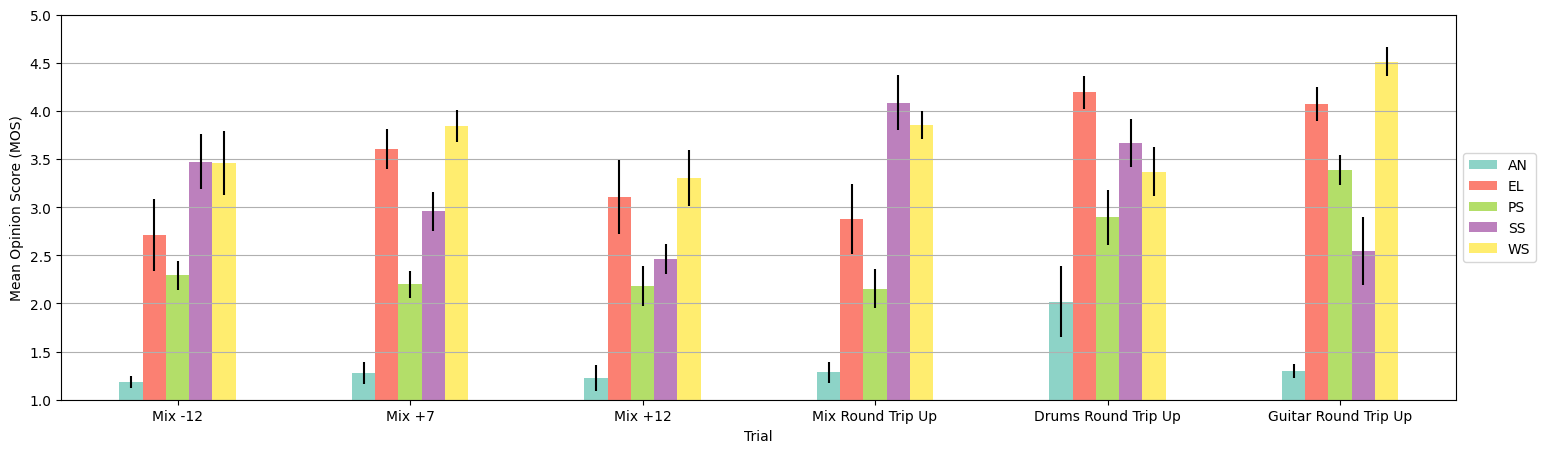

In [64]:
# plot the result with separate an error bar for each stimulus
fig, ax = plt.subplots()
fig.set_size_inches(18, 5) # set size to 18x5
df_grouped['rating_score'].unstack().plot(kind='bar', y='mean', yerr='ci', ax=ax, colormap='Set3')
ax.yaxis.grid(True) # add horizontal grid lines
ax.set_xlabel('Trial')
ax.set_ylabel('Mean Opinion Score (MOS)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0) # set x labels to be written horizontally
ax.set_ylim(1, 5) # set y value range from 1 to 5
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # show legend outside of the plot on the right side
plt.show()